In [1]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

# Validation with br_net data

The synthetic data closely resembles real world data. Information of classes does overlap (classes share the same space on the picture). Since confounder and real features do not overlap it might be easier to learn the confounders compared to the real world.

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

## SimpleConv model

In [2]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
    ]

In [3]:
batch_size = 64

With the test_network class it's easy to test new combinations parameters

### No confounder

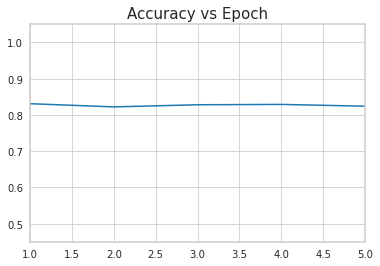

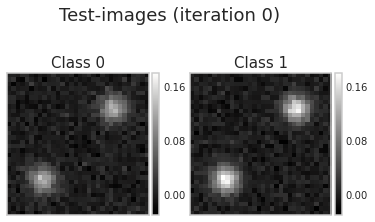

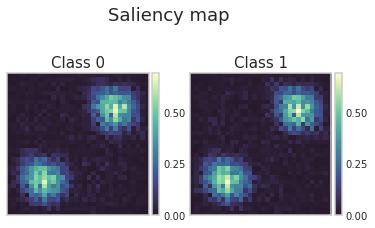

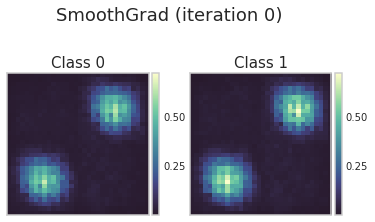

In [4]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=0, test_confounding=[0], params=params)
c.train(model=model, epochs=5, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True, test_images=True, saliency=True, smoothgrad=True)

### Train- and testset confounded

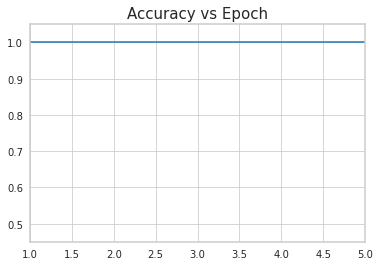

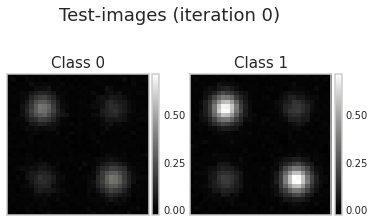

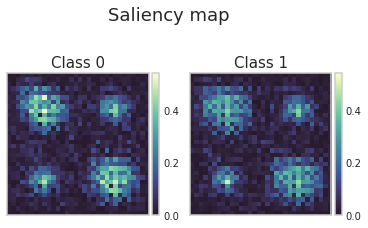

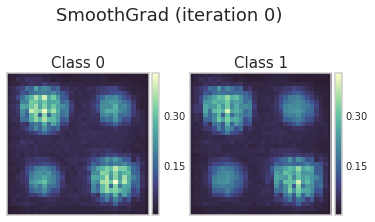

In [5]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[1], params=params)
c.train(model=model, epochs=5, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True, test_images=True, saliency=True, smoothgrad=True)

### Trainset confounded, testset 50% confounding

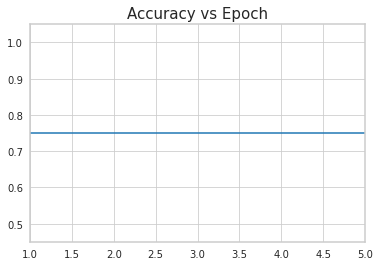

In [6]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[0.5], params=params)
c.train(model=model, epochs=5, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Trainset confounded, testset unconfounded

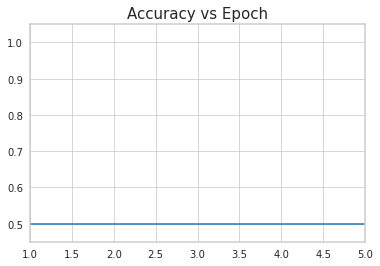

In [7]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[0], params=params)
c.train(model=model, epochs=5, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Accuracy vs. confounding strength in testset

For 5 epochs

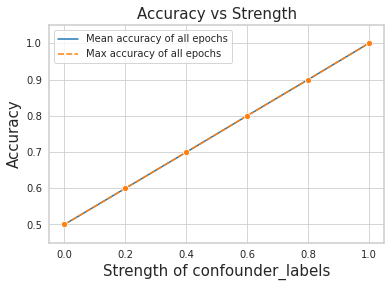

In [8]:
c = CI.confounder(debug=False)
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=5, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)

For 20 epochs

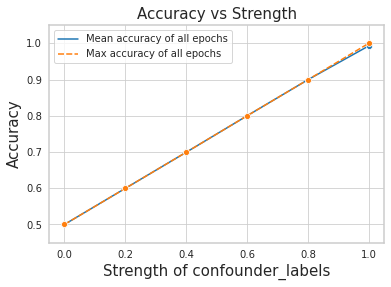

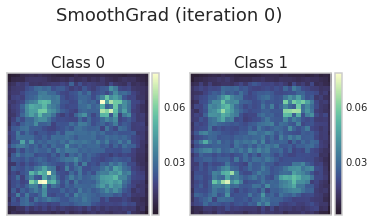

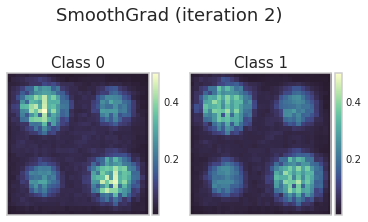

In [9]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=10, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2])

## NeuralNetwork model

### Accuracy vs. confounding strength in testset

For 5 epochs

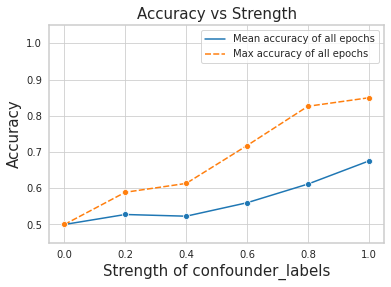

In [10]:
c = CI.confounder()
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=5, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)

For 20 epochs

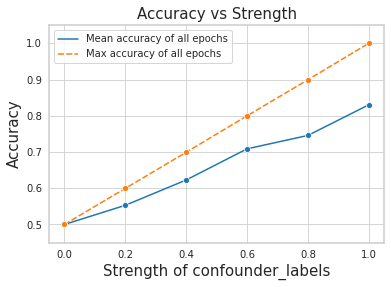

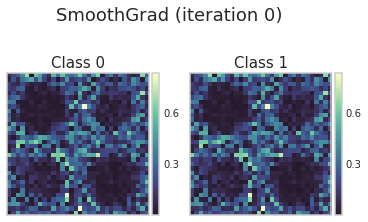

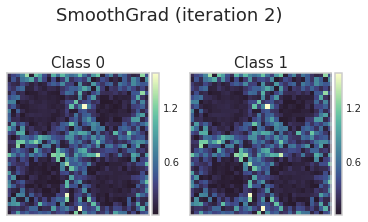

In [11]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=10, batch_size=batch_size, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2])